## Data Pre-processing and Visualization

### Data Loading

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import regex as re
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt


file_name = "training_dataset_windowed_days_90"
data_path = f'/workspaces/msc_thesis/data/final_data/{file_name}.csv'

figure_base_path = f"/workspaces/msc_thesis/data/figures/modelling/{file_name}/"
if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)


def safe_save_fig(output_path):
    """Helper method to safe figures in a potentially non-existent directory."""
    dir_name = os.path.dirname(output_path)
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
    plt.savefig(output_path)


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)


print(f'Total entries: {len(df)}.')

print(f'{df.columns=}')

df.describe()

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 4
pr_merged_key = 'PullRequestIsMerged'


Total entries: 1848492.
df.columns=Index(['ID', 'Project Name', 'PR Number', 'Closed At',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'PullRequestIsMerged',
       'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestExperienceOfIntegrator',
       'ControlIntraProjectPullRequestSuccessRateSubmitter',
       'SubmitterEcosystemExperiencePullRequestSubmissionCount',
       'SubmitterEcosystemExperiencePullRequestSuccessRate',
       'SubmitterEcosystemExperiencePullRequestCommentCount',
       'SubmitterEcosystemExperiencePullRequestDiscussionParticipationCount',
       'SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator',
       'SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter',
       'SharedExperiencePullRequestSubmittedB

### Field classification

Defines fields that should be log-transformed, removed entirely, or are a binary variable.

In [22]:
removed_fields = [
    "SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter",
    "SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator",
    "SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter",
    "SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter",
    "SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator",
    # NOTE: although this is called "PR", it does actually track comments on issues.
    # It's just named incorrectly; the following two features are therefore the same one.
    "SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter.1",
    "SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter",

    "SubmitterDependencyEcosystemExperienceIssueCommentCount",
    "SubmitterDependencyEcosystemExperienceIssueDiscussionParticipationCount",
    "SubmitterDependencyEcosystemExperienceIssueSubmissionCount",

    "SubmitterDependencyEcosystemExperiencePullRequestDiscussionParticipationCount",  # duplicate
    "SubmitterEcosystemExperienceIssueDiscussionParticipationCount",  # duplicate
    "SubmitterEcosystemExperiencePullRequestDiscussionParticipationCount",  # duplicate

    "SubmitterInversedDependencyEcosystemExperienceIssueCommentCount",
    "SubmitterInversedDependencyEcosystemExperienceIssueDiscussionParticipationCount",
    "SubmitterInversedDependencyEcosystemExperienceIssueSubmissionCount",
    "SubmitterInversedDependencyEcosystemExperiencePullRequestDiscussionParticipationCount",  # duplicate
]

log_transformed_fields = [
    "ControlIntraProjectPullRequestExperienceOfIntegrator",
    "ControlNumberOfCommitsInPullRequest",
    "ControlPullRequestLifeTimeInMinutes",

    "SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter",
    "SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator",

    "SubmitterDependencyEcosystemExperiencePullRequestCommentCount",
    "SubmitterDependencyEcosystemExperiencePullRequestSubmissionCount",

    "SubmitterEcosystemExperienceIssueCommentCount",
    "SubmitterEcosystemExperienceIssueSubmissionCount",
    "SubmitterEcosystemExperiencePullRequestCommentCount",
    "SubmitterEcosystemExperiencePullRequestSubmissionCount",

    "SubmitterInversedDependencyEcosystemExperiencePullRequestCommentCount",
    "SubmitterInversedDependencyEcosystemExperiencePullRequestSubmissionCount",
]

binary_fields = [
    "ControlHasHashTagInDescription",
    "ControlIntegratedBySameUser",
    "ControlPullRequestHasCommentByExternalUser",
    "ControlPullRequestHasComments",
    "SubmitterIsFirstTimeContributor",
]

print(f'{len(removed_fields)=}')
print(f'{len(binary_fields)=}')
print(f'{len(log_transformed_fields)=}')

new_log_transformed_fields = []
for field in log_transformed_fields:
    new_field_name = f'log10(1 + {field})'
    new_log_transformed_fields.append(new_field_name)
    df[new_field_name] = np.log10(1 + df[field])

print(f'{df.columns=}')
print(f'{df.columns[df.isna().any()].tolist()=}')
df = df.dropna()

len(removed_fields)=16
len(binary_fields)=5
len(log_transformed_fields)=13


/home/vscode/.local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


df.columns=Index(['ID', 'Project Name', 'PR Number', 'Closed At',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'PullRequestIsMerged',
       'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestExperienceOfIntegrator',
       'ControlIntraProjectPullRequestSuccessRateSubmitter',
       'SubmitterEcosystemExperiencePullRequestSubmissionCount',
       'SubmitterEcosystemExperiencePullRequestSuccessRate',
       'SubmitterEcosystemExperiencePullRequestCommentCount',
       'SubmitterEcosystemExperiencePullRequestDiscussionParticipationCount',
       'SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator',
       'SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter',
       'SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByI

### Data Visualization

ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlPullRequestHasCommentByExternalUser
ControlHasHashTagInDescription
PullRequestIsMerged
SubmitterIsFirstTimeContributor
ControlIntraProjectPullRequestExperienceOfIntegrator
ControlIntraProjectPullRequestSuccessRateSubmitter
SubmitterEcosystemExperiencePullRequestSubmissionCount
SubmitterEcosystemExperiencePullRequestSuccessRate
SubmitterEcosystemExperiencePullRequestCommentCount
SubmitterEcosystemExperiencePullRequestDiscussionParticipationCount
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator
SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter
SharedExperiencePullRequestSubmittedBySubmitterCommentedOnByIntegrator
SharedExperiencePullRequestSubmittedByIntegratorCommentedOnBySubmitter
SharedExperiencePullRequestDiscussionParticipationByIntegratorAndSubmitter
SubmitterDependencyEcosystemExperiencePullRequestSubmissi

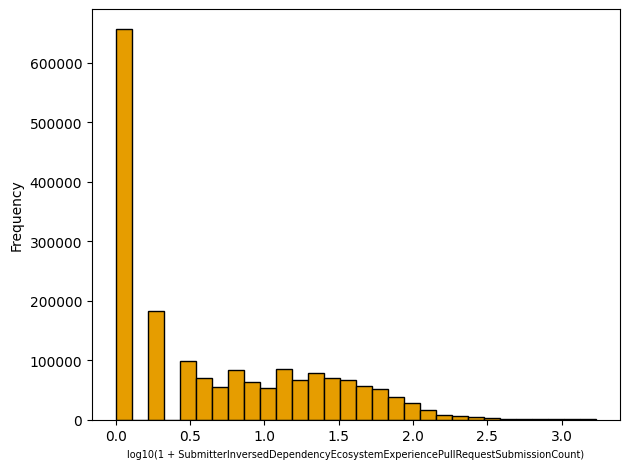

In [23]:
import copy
# shown_fields_without_zeroes = [
#     *log_transformed_fields,
#     *new_log_transformed_fields
# ]
# rx = r'.*(NumberOfCommitsInPullRequest|PullRequestLifeTimeInMinutes).*'
# shown_fields_without_zeroes = set([entry for entry in shown_fields_without_zeroes
#                                    if len(list(re.finditer(rx, entry))) == 0])
# print(f'{shown_fields_without_zeroes=}')

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize():
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


# Iterate over the columns and generate histograms
for column in df.columns[meta_header_count:]:
    print(column)
    plt.clf()
    entries = df[column]

    if column in binary_fields or column == pr_merged_key:
        entries = df[column].replace({False: 0, True: 1})
        plt.xticks(entries.value_counts().index, ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif column in shown_fields_without_zeroes:
    #     _, bins, _ = plt.hist(entries, bins=30, alpha=1,
    #              label="All Data", **default_plot_settings)
    #     ax:plt.Axes = plt.gca()
    #     ax.set_ylabel("Frequency")
    #     ax.set_xlabel(column)
    #     __fix_x_label_fontsize()

    #     filtered_data = df[column][df[column] != 0]
    #     ax2 = ax.twinx()

    #     ax2.hist(filtered_data, bins, alpha=0.5,
    #              label='Excl. zeroes',**default_plot_settings_2)
    #     ax2.set_ylabel("Frequency (Excl. Zeroes)")
    #     ax2.set_zorder(10)
    #     plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(column)
    __fix_x_label_fontsize()
    plt.tight_layout()

    safe_save_fig(f"{figure_base_path}/distributions/{column}.png")


### Data Sieving

Removes unused variables.

In [24]:
df = df.drop(removed_fields, axis=1)
df = df.drop(log_transformed_fields, axis=1)

df.describe()

,ID,PR Number,ControlIntraProjectPullRequestSuccessRateSubmitter,SubmitterEcosystemExperiencePullRequestSuccessRate,SubmitterDependencyEcosystemExperiencePullRequestSuccessRate,SubmitterInversedDependencyEcosystemExperiencePullRequestSuccessRate,log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator),log10(1 + ControlNumberOfCommitsInPullRequest),log10(1 + ControlPullRequestLifeTimeInMinutes),log10(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter),log10(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator),log10(1 + SubmitterDependencyEcosystemExperiencePullRequestCommentCount),log10(1 + SubmitterDependencyEcosystemExperiencePullRequestSubmissionCount),log10(1 + SubmitterEcosystemExperienceIssueCommentCount),log10(1 + SubmitterEcosystemExperienceIssueSubmissionCount),log10(1 + SubmitterEcosystemExperiencePullRequestCommentCount),log10(1 + SubmitterEcosystemExperiencePullRequestSubmissionCount),log10(1 + SubmitterInversedDependencyEcosystemExperiencePullRequestCommentCount),log10(1 + SubmitterInversedDependencyEcosystemExperiencePullRequestSubmissionCount)
count,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06,1.848483e+06
mean,1.476446e+08,3.788417e+03,5.334602e-01,3.742976e-01,5.334602e-01,5.334602e-01,1.489512e+00,4.740259e-01,2.832128e+00,4.232715e-02,2.038921e-01,6.364527e-01,6.857387e-01,8.665015e-01,4.494457e-01,4.774533e-01,4.375546e-01,6.364527e-01,6.857387e-01
std,1.004344e+08,8.027204e+03,4.627121e-01,4.477230e-01,4.627121e-01,4.627121e-01,8.909838e-01,2.938880e-01,1.430906e+00,2.011265e-01,4.242759e-01,7.385602e-01,6.791594e-01,8.155790e-01,5.030887e-01,6.696130e-01,6.050725e-01,7.385602e-01,6.791594e-01
min,6.870000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.989700e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.828347e+07,9.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.781513e-01,3.010300e-01,1.728624e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.374030e+08,5.380000e+02,8.000000e-01,0.000000e+00,8.000000e-01,8.000000e-01,1.477121e+00,3.010300e-01,2.991964e+00,0.000000e+00,0.000000e+00,3.010300e-01,4.771213e-01,6.989700e-01,3.010300e-01,0.000000e+00,0.000000e+00,3.010300e-01,4.771213e-01
75%,2.280283e+08,2.817000e+03,1.000000e+00,9.215686e-01,1.000000e+00,1.000000e+00,2.152288e+00,6.020600e-01,3.865695e+00,0.000000e+00,3.010300e-01,1.204120e+00,1.255273e+00,1.531479e+00,7.781513e-01,9.030900e-01,7.781513e-01,1.204120e+00,1.255273e+00
max,3.617756e+08,8.297600e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.631647e+00,4.000043e+00,6.652197e+00,2.741939e+00,2.744293e+00,3.309417e+00,3.231470e+00,3.885192e+00,3.368473e+00,3.113609e+00,3.006894e+00,3.309417e+00,3.231470e+00


Downsamples the dataset in case you set ``sample`` to ``>0`` (for debugging).

In [25]:
sample_size = 0
if sample_size > 0:
    df = df.sample(sample_size)
    print("WARNING: TRAINING WITH SAMPLE!")

### Creating train and test data.

In [26]:
# Calculates class imbalance.
class_counts = df[pr_merged_key].value_counts()
class_imbalance = max(class_counts) / min(class_counts)
print(f'{class_counts=}')
print(f'{class_imbalance=}')

# Makes 80:20 dataset splits for testing/training
train, test = train_test_split(df, test_size=0.2)
print(f'{len(train)=}, {len(test)=}')

# Labels
train_labels = train[pr_merged_key]
test_labels = test[pr_merged_key]

# Predictors
used_predictors = df.columns[meta_header_count:].drop(pr_merged_key)
train_predictors = train[used_predictors]
test_predictors = test[used_predictors]
print(f'{len(used_predictors)=}')
print(f'{used_predictors=}')

class_counts=PullRequestIsMerged
True     1422696
False     425787
Name: count, dtype: int64
class_imbalance=3.3413326381500608
len(train)=1478786, len(test)=369697
len(used_predictors)=22
used_predictors=Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestSuccessRateSubmitter',
       'SubmitterEcosystemExperiencePullRequestSuccessRate',
       'SubmitterDependencyEcosystemExperiencePullRequestSuccessRate',
       'SubmitterInversedDependencyEcosystemExperiencePullRequestSuccessRate',
       'log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)',
       'log10(1 + ControlNumberOfCommitsInPullRequest)',
       'log10(1 + ControlPullRequestLifeTimeInMinutes)',
       'log10(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter)',
       'log10(1 + SharedExperiencePullReques

# Modelling (Full Model)

## Random Forest

### Model Creation

In [27]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Model creation and predictions.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_predictors, train_labels)
predictions = rf.predict(test_predictors)
predictions = [pred >= 0.5 for pred in predictions]

# Absolute error
absolute_error = abs(predictions ^ test_labels)
print(f'Absolute error: {absolute_error}')

# F1 scores.
conf = confusion_matrix(test_labels, predictions)
imbalance_weight = list([1.0 if label else class_imbalance for label in test_labels])
f1 = f1_score(test_labels, predictions, sample_weight=imbalance_weight)
f1_without_imbalance =  f1_score(test_labels, predictions)
print(f'{f1=}')
print(f'{f1_without_imbalance=}')

# Other metrics.
print(f'{conf=}')
print(classification_report(test_labels, predictions, sample_weight=imbalance_weight))


Absolute error: 1348502    False
601985      True
1819858    False
1625783    False
1431063    False
           ...  
1179294    False
221428     False
1697736    False
735063     False
320663     False
Name: PullRequestIsMerged, Length: 369697, dtype: bool
f1=0.8198718242659032
f1_without_imbalance=0.9209692323488141
conf=array([[ 54415,  30777],
       [ 15407, 269098]])
              precision    recall  f1-score   support

       False       0.92      0.64      0.75 284654.81010917923
        True       0.72      0.95      0.82  284505.0

    accuracy                           0.79 569159.8101091792
   macro avg       0.82      0.79      0.79 569159.8101091792
weighted avg       0.82      0.79      0.79 569159.8101091792



### Generates partial dependence plots

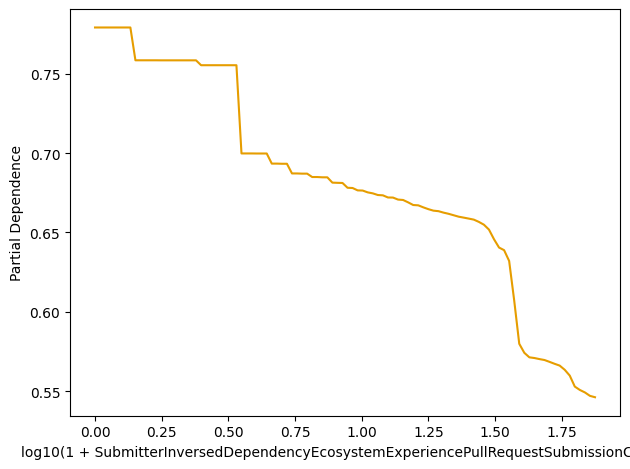

In [36]:
from sklearn.inspection import PartialDependenceDisplay
from matplotlib import pyplot as plt

average_only = True

if average_only:
    # Collective partial dependence plot.
    pdd = PartialDependenceDisplay.from_estimator(
        rf, test_predictors, used_predictors)

    fig = plt.gcf()
    axs = fig.axes

    lines = []
    for ax in axs:
        __lines = list([(line.get_xdata(), line.get_ydata())
                       for line in ax.lines])
        lines.extend(__lines)

    for (x, y), label in zip(lines, used_predictors):
        plt.clf()
        plt.plot(x, y, linestyle='-', color='#e69d00')
        plt.xlabel(label)
        plt.ylabel('Partial Dependence')
        plt.tight_layout()
        safe_save_fig(f"{figure_base_path}/partial-dependence/{label}.png")

else:
    # TODO: create a plot where the average response is displayed
    # as a line, and the min/max as a grey area around it.
    pdd = PartialDependenceDisplay.from_estimator(
        rf, test_predictors, used_predictors, kind='individual')


## Logistic Regression

### Model Creation

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_predictors, train_labels)

lr_predictions = lr.predict(test_predictors)

imbalance_weight = [1.0 if label else class_imbalance for label in test_labels]
mean_accuracy = lr.score(test_predictors, test_labels, sample_weight=imbalance_weight)
print(f'{mean_accuracy=}')

absolute_error = abs(predictions ^ test_labels)
print(f'{absolute_error=}')


lr_f1 = f1_score(test_labels, predictions, sample_weight=imbalance_weight)
lr_f1_without_imbalance = f1_score(test_labels, predictions)
print(f'{lr_f1=}')
print(f'{lr_f1_without_imbalance=}')

conf = confusion_matrix(test_labels, predictions)
print(f'{conf=}')

print(classification_report(test_labels, predictions, sample_weight=imbalance_weight))

mean_accuracy=0.6826245285040192
absolute_error=1348502    False
601985      True
1819858    False
1625783    False
1431063    False
           ...  
1179294    False
221428     False
1697736    False
735063     False
320663     False
Name: PullRequestIsMerged, Length: 369697, dtype: bool
lr_f1=0.8198718242659032
lr_f1_without_imbalance=0.9209692323488141
conf=array([[ 54415,  30777],
       [ 15407, 269098]])
              precision    recall  f1-score   support

       False       0.92      0.64      0.75 284654.81010917923
        True       0.72      0.95      0.82  284505.0

    accuracy                           0.79 569159.8101091792
   macro avg       0.82      0.79      0.79 569159.8101091792
weighted avg       0.82      0.79      0.79 569159.8101091792



### Calculate coefficients, p-values etc.

In [30]:
import statsmodels.api as sm

value_mapper = {False: 0, True: 1}
for feature in binary_fields:
    train_predictors[feature] = train_predictors[feature].replace(value_mapper)
    test_predictors[feature] = test_predictors[feature].replace(value_mapper)

sm_lr = sm.Logit(train_labels, train_predictors)
result = sm_lr.fit()

print(result.params)

predictions = result.predict(test_predictors)
predictions = [pred >= 0.5 for pred in predictions]

result.pred_table()

print('summary 1:')
result.summary()

print('summary 2:')
result.summary2()

/tmp/ipykernel_1908/3820197374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predictors[feature] = train_predictors[feature].replace(value_mapper)
/tmp/ipykernel_1908/3820197374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_predictors[feature] = test_predictors[feature].replace(value_mapper)


len(train_predictors.columns)=22
Index(['ControlIntegratedBySameUser', 'ControlPullRequestHasComments',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription', 'SubmitterIsFirstTimeContributor',
       'ControlIntraProjectPullRequestSuccessRateSubmitter',
       'SubmitterEcosystemExperiencePullRequestSuccessRate',
       'SubmitterDependencyEcosystemExperiencePullRequestSuccessRate',
       'SubmitterInversedDependencyEcosystemExperiencePullRequestSuccessRate',
       'log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)',
       'log10(1 + ControlNumberOfCommitsInPullRequest)',
       'log10(1 + ControlPullRequestLifeTimeInMinutes)',
       'log10(1 + SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter)',
       'log10(1 + SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)',
       'log10(1 + SubmitterDependencyEcosystemExperiencePullRequestCommentCount)',
       'log10(1 + SubmitterDependencyEcosy

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                             Results: Logit
========================================================================================================================================================================
Model:                                                Logit                                               Pseudo R-squared:                                 0.232       
Dependent Variable:                                   PullRequestIsMerged                                 AIC:                                              1225049.1788
Date:                                                 2023-06-28 08:39                                    BIC:                                              1225268.9000
No. Observations:                                     1478786                                             Log-Likelihood:                                   -6.1251e+05 
Df Model:                                             17                                                  LL-Null:                                          -7.9805e+05 
Df Residuals:                                         1478768                                             LLR p-value:                                      0.0000      
Converged:                                            1.0000                                              Scale:                                            1.0000      
No. Iterations:                                       7.0000                                                                                                            
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                     Coef.       Std.Err.          z     P>|z|         [0.025               0.975]      
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ControlIntegratedBySameUser                                                         -1.2581             0.0067 -187.5637 0.0000              -1.2713             -1.2450
ControlPullRequestHasComments                                                       -0.7811             0.0059 -132.0231 0.0000              -0.7927             -0.7695
ControlPullRequestHasCommentByExternalUser                                           0.1108             0.0053   20.7262 0.0000               0.1003              0.1213
ControlHasHashTagInDescription                                                       0.2169             0.0049   44.5647 0.0000               0.2074              0.2265
SubmitterIsFirstTimeContributor                                                      1.2453             0.0059  212.2585 0.0000               1.2338              1.2568
ControlIntraProjectPullRequestSuccessRateSubmitter                                   1.1436  578742793706.1678    0.0000 1.0000  -1134315031975.0398  1134315031977.3269
SubmitterEcosystemExperiencePullRequestSuccessRate                                   0.6610             0.0080   82.8687 0.0000               0.6454              0.6766
SubmitterDependencyEcosystemExperiencePullRequestSuccessRate                         1.1436                nan       nan    nan                  nan                 nan
SubmitterInversedDependencyEcosystemExperiencePullRequestSuccessRate                 1.1436        448022.2050    0.0000 1.0000         -878106.2425         878108.5297
log10(1 + ControlIntraProjectPullRequestExperienceOfIntegrator)                      0.3914             0.0031  124.6238 0.0000               0.3852              0.3975
log10(1 + ControlNumberOfCommitsInPullRequest)                                       0.5593             0.0083   67.5892 0.0000              